In [1]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from subprocess import Popen,PIPE,STDOUT,call

In [2]:
from IPython.core.pylabtools import figsize
figsize(20, 10)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def tree(prefix='Sherpa', directory='', depth=2):
    proc=Popen('tree -L {depth} {prefix}Results/'.format(depth=depth, prefix=prefix) +directory, shell=True, stdout=PIPE, )
    output=proc.communicate()[0]
    print(output)
    
def loss_plot(df):    
    sns.lineplot(x='Iteration',y='mse',data=df,label='mse')
    sns.lineplot(x='Iteration',y='val_mse',data=df,label='val mse'); 
    
def view_hyper_params(df):
    params = ['net_type', 'loss_type', 'lr', 'num_layers', 'dropout', 'batch_norm', 'Trial-ID', 'val_loss']
    for param in params:
        if param == 'val_loss':
            print(param, ':', df[param].min())
        else:
            try: print(param, ':', df[param].unique()[0])
            except: pass
        
def plot(folder, model_type):    
    df = pd.read_csv('SherpaResults/{}/{}/output/results.csv'.format(folder, model_type))
    df['val_mse'] = np.nan; df['mse'] = np.nan
    
    for trial_num in df['Trial-ID'].unique():
        try:
            with open('SherpaResults/{}/{}/Models/%05d.json'.format(folder, model_type)  % trial_num) as mse_file:
                mse_info = eval(mse_file.read())
            mse_info['mean_squared_error'].insert(0,np.nan); mse_info['val_mean_squared_error'].insert(0,np.nan)
            
            for itr in range(len(df['mse'][df['Trial-ID'] == trial_num])):
                df['mse'][(df['Trial-ID'] == trial_num) & (df['Iteration'] == itr)] = mse_info['mean_squared_error'][itr]
                df['val_mse'][(df['Trial-ID'] == trial_num) & (df['Iteration'] == itr)] = mse_info['val_mean_squared_error'][itr]
        except:
            continue 
            
    good_trials = df[(df['val_mse'] < 1000) & (df['val_mse'] > 0)]['Trial-ID'].unique()
    good_trials_df = df[df['Trial-ID'].isin(good_trials)].reset_index()
    
    plt.title(model_type.replace('_', ' '))
    loss_plot(good_trials_df)

    best_trial_ID = good_trials_df.iloc[good_trials_df['val_mse'].idxmin()]['Trial-ID']

    min_loss_trial = good_trials_df[good_trials_df['Trial-ID'] == best_trial_ID]
    min_loss = df['val_mse'].min()
    
    plt.subplots_adjust(hspace = 0.4)
    plt.show()
    return good_trials_df, min_loss_trial

# Sherpa Results
---

In [5]:
tree()

SherpaResults/
├── 8col
│   └── normal_mse
├── 8col_local
│   └── normal_mse
├── 8col_random
│   └── normal_mse
├── fluxbypass_aqua
│   ├── conservation_mse
│   ├── conservation_weak_loss
│   ├── normal_mse
│   └── normal_weak_loss
├── fluxbypass_aqua_local
│   ├── conservation_mse
│   ├── conservation_weak_loss
│   ├── normal_mse
│   └── normal_weak_loss
├── fluxbypass_aqua_random_search
│   ├── conservation_mse
│   ├── conservation_weak_loss
│   ├── normal_mse
│   └── normal_weak_loss
├── land_data
│   └── normal_mse
└── land_data_random
    └── normal_mse

25 directories, 0 files



# Random Search
---
### Normal MSE

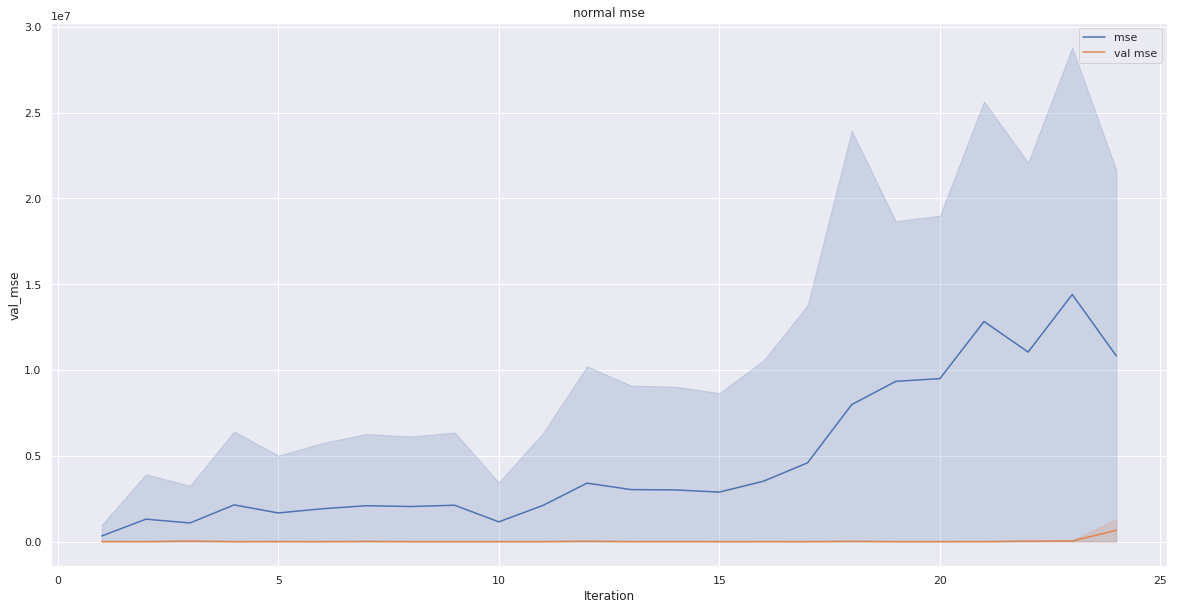

In [6]:
good, best = plot('fluxbypass_aqua_random_search', 'normal_mse')

### Normal Weak Loss

### Conservation MSE

### Conservation Weak Loss

In [7]:
best_random_search_trial = plot('fluxbypass_aqua_random_search')

TypeError: plot() takes exactly 2 arguments (1 given)

In [ ]:
loss_plot(best_random_search_trial)

In [ ]:
view_hyper_params(best_random_search_trial)

This model can be found in `SherpaResults/fluxbypass_aqua_random_search/conservation_weak_loss/output/Models/6.json`

# Local Search

In [ ]:
best_local_search_trial = plot('fluxbypass_aqua')

In [ ]:
loss_plot(best_local_search_trial)

# Best Configuration

In [ ]:
view_hyper_params(best_local_search_trial)

This model can be found in `SherpaResults/fluxbypass_aqua/normal_weak_loss/output/Models/1.json`